### Relevante pakker

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [5]:
df = pd.read_csv("lego_data/Data/lego.population.csv", sep = ",", encoding = "latin1")

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [6]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Ages',  'Unique_Pieces', 'Price', 'Pieces']]
# Pris som respons, forklaringsvariabel: antall brikker, unike brikker

# Omfordel alder. Se på siste tall (?)

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# # gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Ages'] = df2['Ages'].astype(str)
df2['Ages'] = df2['Ages'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)
df2['Ages'] = df2['Ages'].str.split('Ages').str[1]
df2['Ages'] = df2['Ages'].apply(lambda x: x.split('-')[1] if '-' in x else x)
#df2['Ages'] = df2['Ages'].str.split('-').str[0]

# Konverter til numeriske verdier
df2['Ages'] = pd.to_numeric(df2['Ages'], errors='coerce')  
bins = [0, 6, 12, 100]
labels = ['0-6', '6-12', '12 +']

df2['Ages'] = pd.cut(df2['Ages'], bins=bins, labels=labels, right=False, ordered=True)
df2['Ages'] = df2['Ages'].astype(str)
df2 = df2.sort_values(by='Ages')

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

# det er dataset dere skal bruke!
df2

<>:27: SyntaxWarning: invalid escape sequence '\$'
<>:27: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Jon Bergland\AppData\Local\Temp\ipykernel_14944\4262552759.py:27: SyntaxWarning: invalid escape sequence '\$'
  df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)


,Ages,Unique_Pieces,Price,Pieces
444,0-6,231.0,39.99,900.0
578,0-6,137.0,59.99,223.0
816,0-6,42.0,59.99,104.0
458,0-6,62.0,49.99,234.0
154,0-6,112.0,19.99,200.0
...,...,...,...,...
459,6-12,211.0,49.99,540.0
460,6-12,185.0,49.99,450.0
461,6-12,212.0,49.99,489.0
467,6-12,57.0,19.99,125.0


In [7]:
#(lambda: DeepnoteChart(df2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Ages","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(df2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Ages","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

### Mer eller mindre relevante kodesnutter

In [8]:
print(df2.mean(numeric_only = True))

Unique_Pieces    130.364583
Price             46.333561
Pieces           432.086174
dtype: float64


In [9]:
print(df2['Ages'].value_counts())


Ages
6-12    569
12 +    302
0-6     185
Name: count, dtype: int64


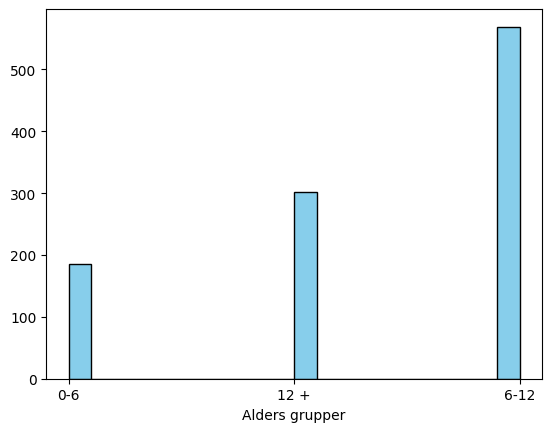

In [10]:
plt.hist(df2['Ages'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Alders grupper')
plt.ylabel('')
#plt.gca().set_aspect(1)
plt.show()

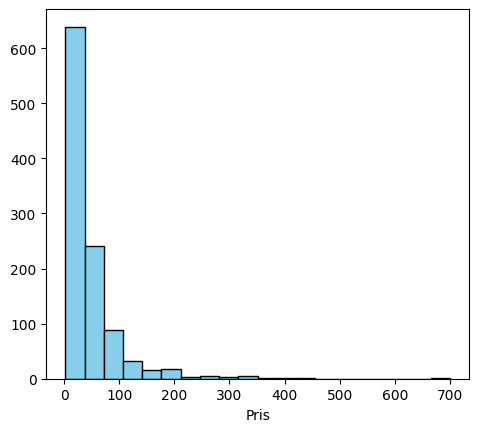

In [11]:
# Histogram av responsen pris: 
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

C:\Users\Jon Bergland\AppData\Local\Temp\ipykernel_14944\446674072.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1['Price'], data2['Price'], data3['Price']], labels=['0-6', '6-12', '12+'])


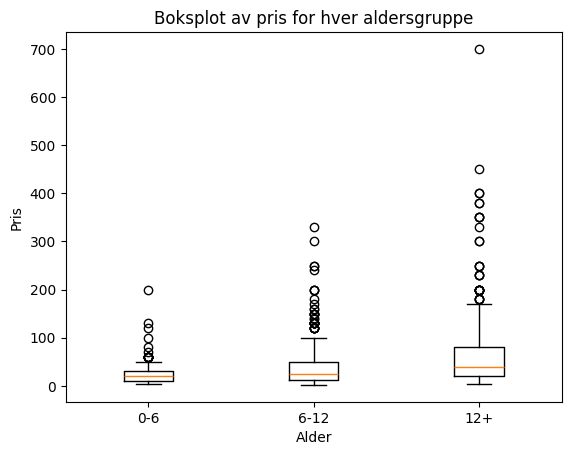

In [12]:
#plt.scatter(df2['Ages'], df2['Price'])
data1 = df2[df2['Ages'] == '0-6']
data2 = df2[df2['Ages'] == '6-12']
data3 = df2[df2['Ages'] == '12 +']

plt.boxplot([data1['Price'], data2['Price'], data3['Price']], labels=['0-6', '6-12', '12+'])
plt.ylabel('Pris')
plt.xlabel('Alder')
plt.title('Boksplot av pris for hver aldersgruppe')
plt.show()


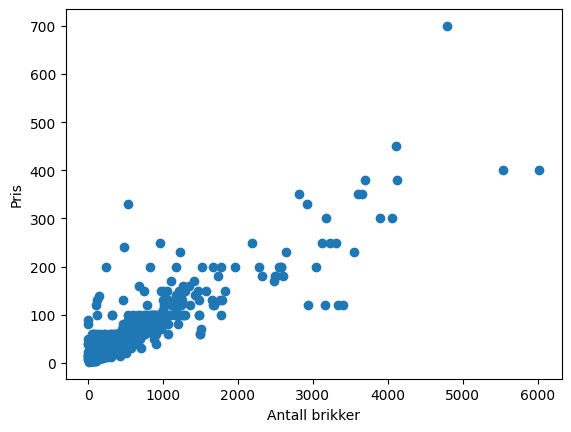

In [13]:
#plotter forklaringsvariabel antall brikker mot respons pris
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.gca().set_aspect('auto')
plt.show()

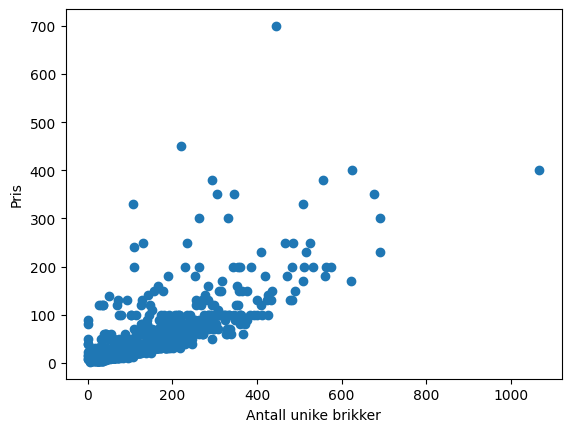

In [14]:
#Plotter forklaringsvariabelen antall unike brikker mot responsen pris
plt.scatter(df2['Unique_Pieces'], df2['Price'])
plt.xlabel('Antall unike brikker')
plt.ylabel('Pris')
plt.gca().set_aspect('auto')
plt.show()

In [15]:
# Orginal: hva er det dyreste settet i datasettet mon tro? 
print(df2.loc[df2['Price'].idxmax()])
# Det er en Imperial Star Destroyer

Ages               12 +
Unique_Pieces     445.0
Price            699.99
Pieces           4784.0
Name: 825, dtype: object


In [16]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Ages               12 +
Unique_Pieces     624.0
Price            399.99
Pieces           6020.0
Name: 821, dtype: object


In [18]:
# hvilke alderene har høyest median pris?
#df2.groupby('Ages')['Price'].mean().sort_values(ascending=True)[:4]
df2['Price'].mean()

np.float64(46.33356060606061)

In [100]:
# hvilke tema har flest brikker?
df2.groupby('Ages')['Unique_Pieces'].mean().sort_values(ascending=False)[:4]

Ages
12 +    175.483444
6-12    127.462214
0-6      65.637838
Name: Unique_Pieces, dtype: float64

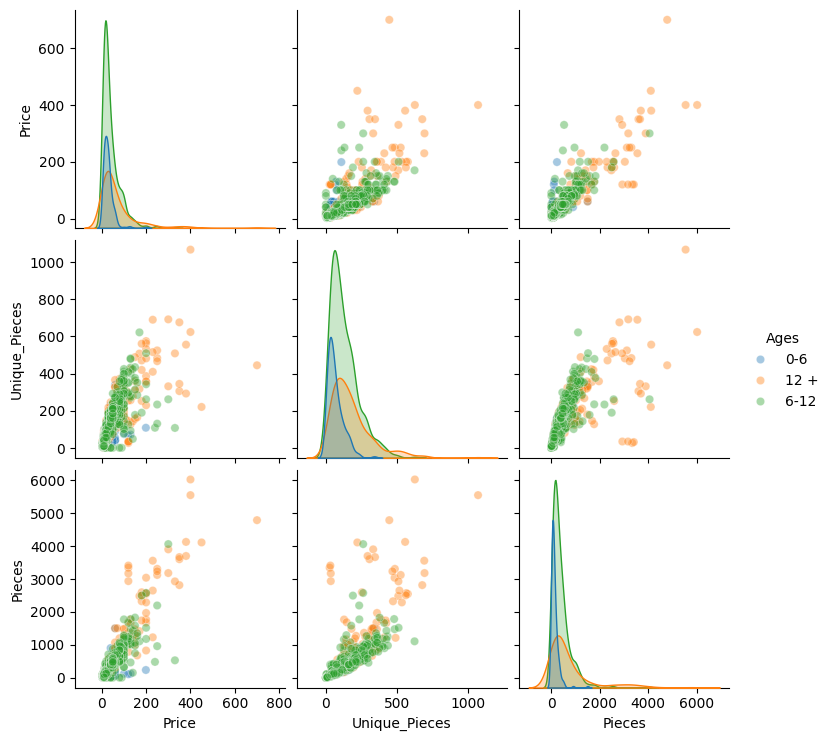

In [101]:
sns.pairplot(df2, vars = ['Price', 'Unique_Pieces', 'Pieces'],
             hue = 'Ages', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [102]:
# enkel lineær regresjon
# def map_age_to_int(age):
#     if age == '0-6':
#         return 0
#     if age == '6-12':
#         return 6
#     if age == "12+":
#         return 12
#     else:
#         return -1
# df3 = df2
# for index, row in df3.iterrows():
#     age_value = row['Ages']  
#     age = map_age_to_int(age_value) 
#     df3.at[index, 'Ages'] = age 
    

# formel = 'Unique_Pieces ~ Ages + Pieces + Price'

# # modell = smf.ols(formel, data = df3)
# # resultat = modell.fit()

# resultat.summary()

In [103]:
# enkel lineær regresjon
import statsmodels.formula.api as smf
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     4000.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:40:23   Log-Likelihood:                -4964.0
No. Observations:                1056   AIC:                             9932.
Df Residuals:                    1054   BIC:                             9942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0551      0.992     11.147      0.000       9.109      13.001
Pieces         0.0816      0.001     63.244      0.000       0.079       0.084
==============================================================================
Omnibus:                      852.864   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59542.976
Skew:                           3.164   Prob(JB):                         0.00
Kurtosis:                      39.238   Cond. No.                         929.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

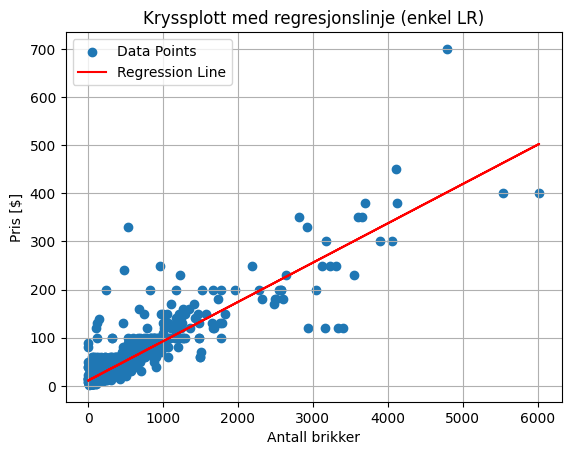

In [104]:
#origi
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

In [105]:
# enkel lineær regresjon
formel = 'Price ~ Unique_Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1325.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.67e-188
Time:                        11:40:23   Log-Likelihood:                -5361.9
No. Observations:                1056   AIC:                         1.073e+04
Df Residuals:                    1054   BIC:                         1.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.6503      1.821     -2.005      0.045      -7.223      -0.078
Unique_Pieces     0.3834      0.011     36.397      0.000       0.363       0.404
==============================================================================
Omnibus:                     1199.878   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120894.336
Skew:                           5.540   Prob(JB):                         0.00
Kurtosis:                      54.233   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

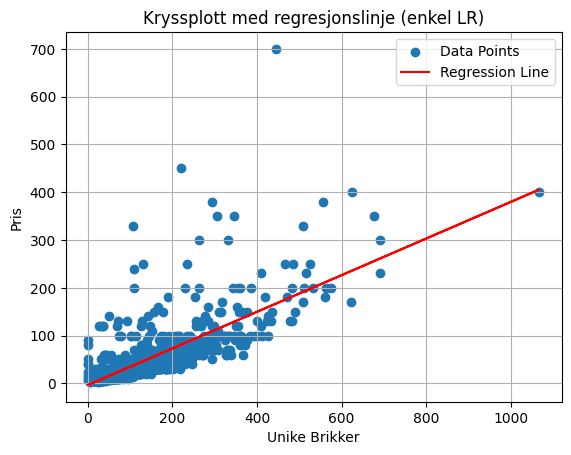

In [106]:
slope = resultat.params['Unique_Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Unique_Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Unique_Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Unike Brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

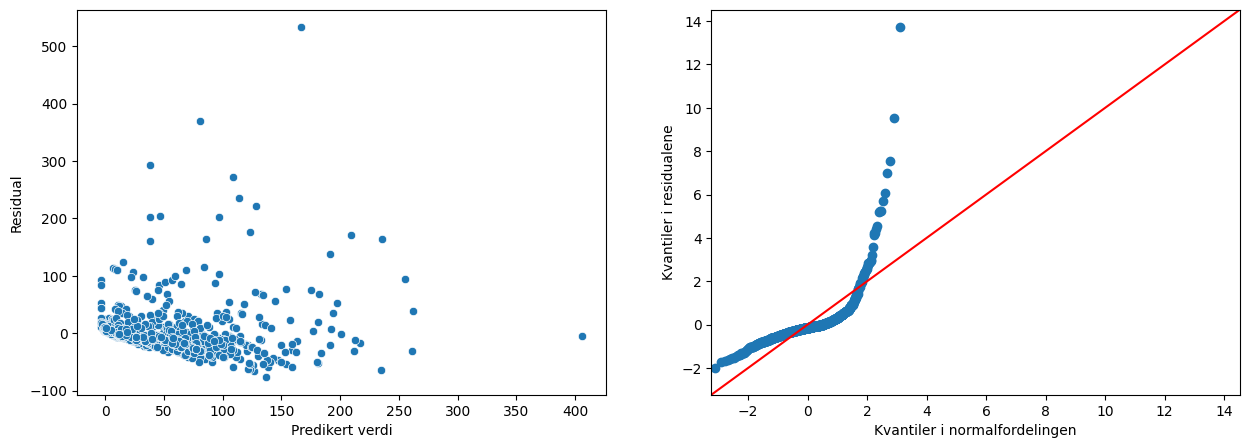

In [107]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

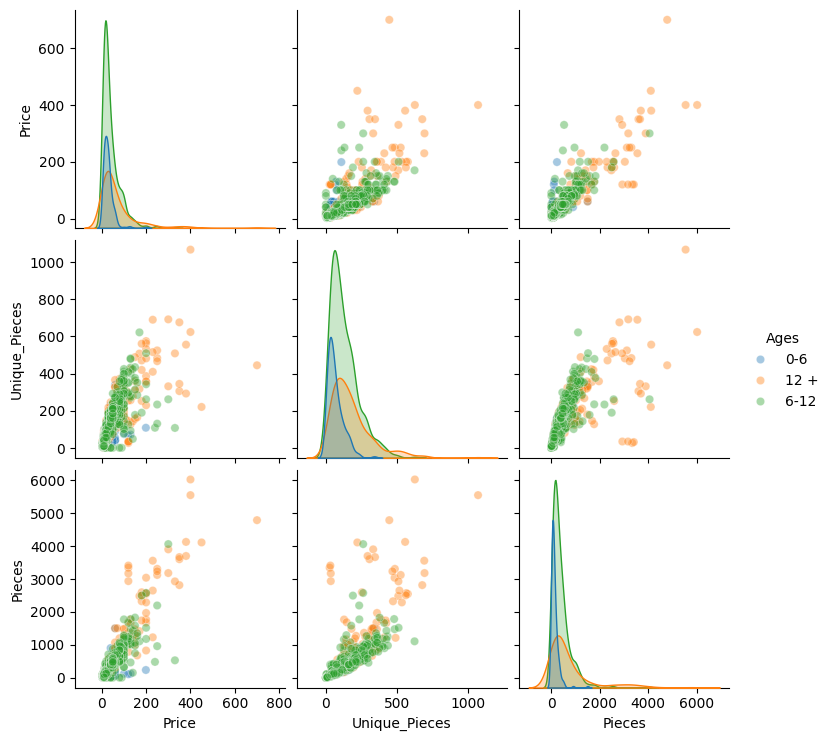

In [108]:
#ages = [0, 6, 12]
df2 = df2.dropna(subset=['Ages'])
sns.pairplot(df2, vars = ['Price', 'Unique_Pieces', 'Pieces'],
             hue = 'Ages', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [109]:
# enkel lineær regresjon med pris og unike brikker,tar ikke hensyn til aldersgrupper
res_sub = smf.ols('Price ~ Unique_Pieces' , data = df2).fit()

In [110]:
# enkel LR for hver aldersgruppe hver for seg
resultater = []
for age in labels:
    modell3 = smf.ols('Price ~ Unique_Pieces ' , data = df2[df2['Ages'] == age])
    resultater.append(modell3.fit())

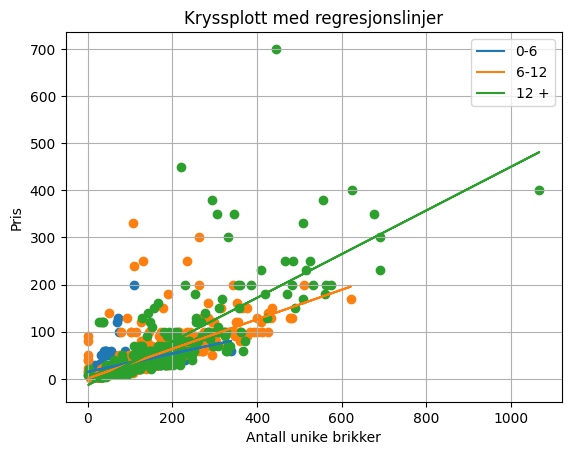

In [111]:
# plott av dataene og regresjonslinjene
for i, age in enumerate(labels):
    slope = resultater[i].params['Unique_Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(df2[df2['Ages'].isin([age])]['Unique_Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(df2[df2['Ages'] == age]['Unique_Pieces'], df2[df2['Ages'] == age]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=age)
    
plt.xlabel('Antall unike brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [112]:
# enkel lineær regresjon med pris og antall brikker,tar ikke hensyn til aldersgrupper
res_sub = smf.ols('Price ~ Pieces' , data = df2).fit()

In [113]:
# enkel LR for hvert aldersgruppe hver for seg
resultater = []
for age in labels:
    modell3 = smf.ols('Price ~ Pieces ' , data = df2[df2['Ages'] == age])
    resultater.append(modell3.fit())

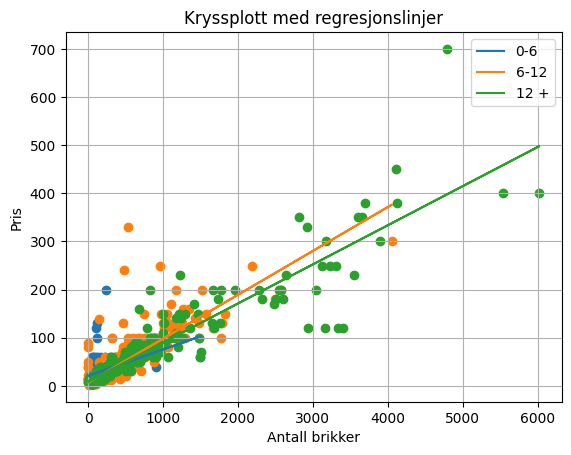

In [114]:
# plott av dataene og regresjonslinjene
for i, age in enumerate(labels):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(df2[df2['Ages'].isin([age])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(df2[df2['Ages'] == age]['Pieces'], df2[df2['Ages'] == age]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=age)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [115]:
#kryssplott med regresjonslinjer for antall brikker
# enkel LR for hvert tema hver for seg


## 

In [116]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Unique_Pieces + Pieces + C(Ages)' , data = df2)
#modell3_mlr.fit().summary()

parameters = modell3_mlr.fit().params

intercept = parameters['Intercept']
age_12_plus = parameters['C(Ages)[T.12 +]']
age_6_12 = parameters['C(Ages)[T.6-12]']
unique_pieces_coef = parameters['Unique_Pieces']
pieces_coef = parameters['Pieces']

print("Intercept:", intercept)
print("C(Ages)[T.12 +]:", age_12_plus)
print("C(Ages)[T.6-12]:", age_6_12)
print("Unique_Pieces:", unique_pieces_coef)
print("Pieces:", pieces_coef)



Intercept: 13.088646339286448
C(Ages)[T.12 +]: -12.334789830039194
C(Ages)[T.6-12]: -9.696571705458584
Unique_Pieces: 0.08362598894475651
Pieces: 0.07196567377419902


In [19]:

modell3_mlr_alt = smf.ols('Price ~ C(Ages)' , data = df2)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     34.92
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.08e-15
Time:                        11:15:18   Log-Likelihood:                -5757.7
No. Observations:                1056   AIC:                         1.152e+04
Df Residuals:                    1053   BIC:                         1.154e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          27.5979      4.157      6.639      0.000      19.442      35.754
C(Ages)[T.12 +]    40.3938      5.278      7.653      0.000      30.036      50.751
C(Ages)[T.6-12]    13.3321      4.785      2.786      0.005       3.943      22.721
==============================================================================
Omnibus:                      890.452   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27266.368
Skew:                           3.738   Prob(JB):                         0.00
Kurtosis:                      26.744   Cond. No.                         5.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

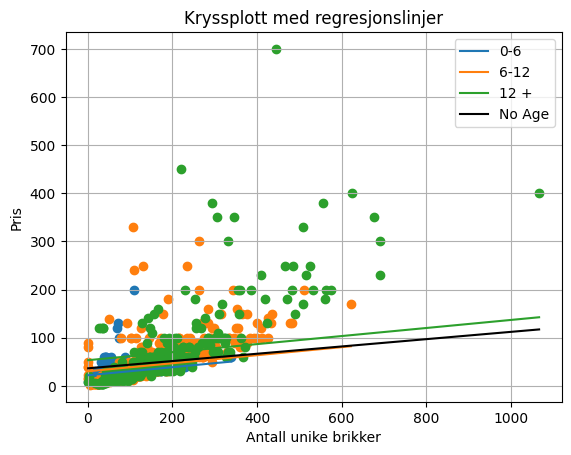

In [118]:
# plott
fit_results = modell3_mlr.fit()
intercept = [
    fit_results.params.get('Intercept', 0),
    fit_results.params.get('C(Ages)[T.6-12]', 0) + fit_results.params['Intercept'],
    fit_results.params.get('C(Ages)[T.12 +]', 0) + fit_results.params['Intercept']
]

slope_unique_pieces = [
    fit_results.params.get('Unique_Pieces',0),
    fit_results.params.get('Unique_Pieces',0) + fit_results.params.get('Unique_Pieces:Ages[T.6-12]', 0), 
    fit_results.params.get('Unique_Pieces',0) + fit_results.params.get('Unique_Pieces:Ages[T.12 +]', 0)
]

slope_pieces = [
    fit_results.params.get('Pieces', 0),
    fit_results.params.get('Pieces', 0) + fit_results.params.get('Pieces:Ages[T.6-12]', 0), 
    fit_results.params.get('Pieces', 0) + fit_results.params.get('Pieces:Ages[T.12 +]', 0)
]

for i, age in enumerate(labels):
    age_data = df2[df2['Ages'] == age]

    regression_x = np.linspace(age_data['Unique_Pieces'].min(), age_data['Unique_Pieces'].max(), 100)
    regression_y = (
        intercept[i] + 
        slope_unique_pieces[i] * regression_x 
        + slope_pieces[i] * age_data['Pieces'].mean()
    )


    # Plot scatter plot and regression line
    plt.scatter(age_data['Unique_Pieces'], age_data['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=age)
    
res_sub = smf.ols('Price ~ Unique_Pieces + Pieces', data=df2).fit()
regression_x = np.linspace(df2['Unique_Pieces'].min(), df2['Unique_Pieces'].max(), 100)
regression_y = (
    res_sub.params['Intercept'] +
    res_sub.params['Unique_Pieces'] * regression_x +
    res_sub.params['Pieces'] * df2['Pieces'].mean() 
)
plt.plot(regression_x, regression_y, color='black', label='No Age')

plt.xlabel('Antall unike brikker') 
plt.ylabel('Pris')                
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

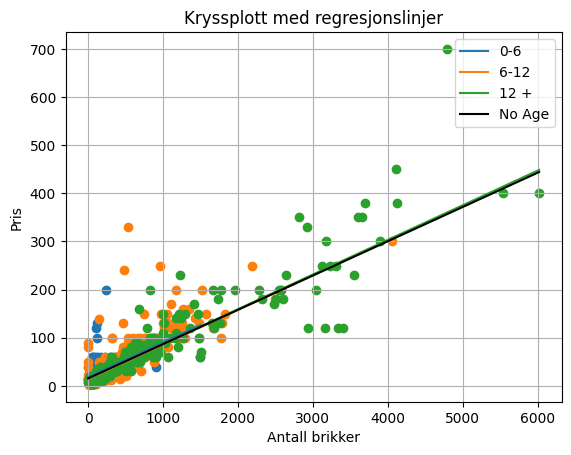

In [119]:
# plott
fit_results = modell3_mlr.fit()
intercept = [
    fit_results.params.get('Intercept', 0),
    fit_results.params.get('C(Ages)[T.6-12]', 0) + fit_results.params['Intercept'],
    fit_results.params.get('C(Ages)[T.12 +]', 0) + fit_results.params['Intercept']
]

slope_unique_pieces = [
    fit_results.params.get('Unique_Pieces',0),
    fit_results.params.get('Unique_Pieces',0) + fit_results.params.get('Unique_Pieces:Ages[T.6-12]', 0), 
    fit_results.params.get('Unique_Pieces',0) + fit_results.params.get('Unique_Pieces:Ages[T.12 +]', 0)
]

slope_pieces = [
    fit_results.params.get('Pieces', 0),
    fit_results.params.get('Pieces', 0) + fit_results.params.get('Pieces:Ages[T.6-12]', 0), 
    fit_results.params.get('Pieces', 0) + fit_results.params.get('Pieces:Ages[T.12 +]', 0)
]

#slope_unique_pieces = fit_results.params['Unique_Pieces']
#slope_pieces = fit_results.params['Pieces']

for i, age in enumerate(labels):
    age_data = df2[df2['Ages'] == age]

    regression_x = np.linspace(age_data['Pieces'].min(), age_data['Pieces'].max(), 100)
    regression_y = (
        intercept[i] + 
        slope_pieces[i] * regression_x 
        + slope_unique_pieces[i] * age_data['Unique_Pieces'].mean()
    )


    # Plot scatter plot and regression line
    plt.scatter(age_data['Pieces'], age_data['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=age)
    
res_sub = smf.ols('Price ~ Unique_Pieces + Pieces', data=df2).fit()
regression_x = np.linspace(df2['Pieces'].min(), df2['Pieces'].max(), 100)
regression_y = (
    res_sub.params['Intercept'] +
    res_sub.params['Pieces'] * regression_x +
    res_sub.params['Unique_Pieces'] * df2['Unique_Pieces'].mean() 
)
plt.plot(regression_x, regression_y, color='black', label='No Age')

plt.xlabel('Antall brikker') 
plt.ylabel('Pris')                
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [120]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Unique_Pieces*Pieces*Ages' , data = df2)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     401.6
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:40:27   Log-Likelihood:                -4918.0
No. Observations:                1056   AIC:                             9860.
Df Residuals:                    1044   BIC:                             9919.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            12.7535      3.366      3.789      0.000       6.149      19.358
Ages[T.12 +]                        -14.3416      4.506     -3.183      0.002     -23.183      -5.501
Ages[T.6-12]                        -11.1309      4.132     -2.694      0.007     -19.240      -3.022
Unique_Pieces                         0.2082      0.111      1.874      0.061      -0.010       0.426
Unique_Pieces:Ages[T.12 +]           -0.1067      0.113     -0.945      0.345      -0.328       0.115
Unique_Pieces:Ages[T.6-12]           -0.1237      0.113     -1.093      0.275      -0.346       0.098
Pieces                                0.0275      0.075      0.366      0.715      -0.120       0.175
Pieces:Ages[T.12 +]                   0.0453      0.075      0.603      0.547      -0.102       0.193
Pieces:Ages[T.6-12]                   0.0530      0.075      0.702      0.483      -0.095       0.201
Unique_Pieces:Pieces                 -0.0001      0.000     -0.805      0.421      -0.000       0.000
Unique_Pieces:Pieces:Ages[T.12 +]     0.0001      0.000      0.771      0.441      -0.000       0.000
Unique_Pieces:Pieces:Ages[T.6-12]     0.0001      0.000      0.688      0.492      -0.000       0.000
==============================================================================
Omnibus:                     1056.191   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97788.367
Skew:                           4.432   Prob(JB):                         0.00
Kurtosis:                      49.302   Cond. No.                     3.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
modell3_mlr = smf.ols('Price ~ Unique_Pieces + Pieces + C(Ages)' , data = df2)
modell3_mlr.fit().summary()
# y1 = B0 + B1*x1 + B2*x2 + B3*x3 + B4*x4

# B0 er konstantleddet fra aldersgruppe 0-6
# B1 er gjennomsnitt forskjell fra om det er aldersgruppe 6-12 eller ikke
# x1 er 0 eller 1 avhengig om det er aldersgruppe 6-12 eller ikke
# B2 er gjennomsnitts forskjell fra om det er aldersgruppe 12+ eller ikke
# x2 er 0 eller 1 avhengig om det er aldersgruppe 12+ eller ikke
# B3 er gjennomsnittseffekten på Unike brikker
# x3 er antall unike brikker i settet
# B4 er gjennomsnittseffekten på Antall brikker
# x4 er antall brikker i settet

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1084.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:40:27   Log-Likelihood:                -4928.8
No. Observations:                1056   AIC:                             9868.
Df Residuals:                    1051   BIC:                             9892.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0886      1.981      6.607      0.000       9.201      16.976
C(Ages)[T.12 +]   -12.3348      2.560     -4.819      0.000     -17.358      -7.312
C(Ages)[T.6-12]    -9.6966      2.232     -4.344      0.000     -14.076      -5.317
Unique_Pieces       0.0836      0.011      7.512      0.000       0.062       0.105
Pieces              0.0720      0.002     36.073      0.000       0.068       0.076
==============================================================================
Omnibus:                     1028.708   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89553.495
Skew:                           4.256   Prob(JB):                         0.00
Kurtosis:                      47.304   Cond. No.                     3.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

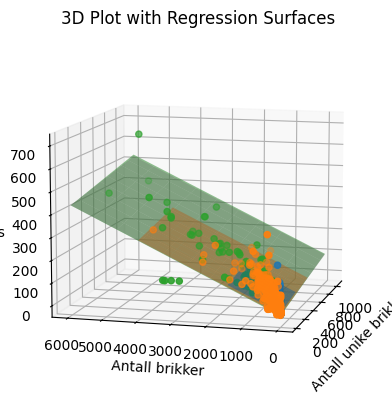

In [147]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Plotting in 3D without automatic legend generation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate regression surface and scatter plot for each age group
for i, age in enumerate(labels):
    age_data = df2[df2['Ages'] == age]

    # Scatter plot with label
    ax.scatter(
        age_data['Unique_Pieces'], 
        age_data['Pieces'], 
        age_data['Price'], 
        color=plt.cm.tab10(i), 
        label=age,  # Label for manual legend
        s=20  # Adjust marker size as needed
    )

    # Regression surface
    regression_x = np.linspace(age_data['Unique_Pieces'].min(), age_data['Unique_Pieces'].max(), 10)
    regression_y = np.linspace(age_data['Pieces'].min(), age_data['Pieces'].max(), 10)
    regression_x, regression_y = np.meshgrid(regression_x, regression_y)
    regression_z = (
        intercept[i] + 
        slope_unique_pieces[i] * regression_x + 
        slope_pieces[i] * regression_y
    )
    
    ax.plot_surface(regression_x, regression_y, regression_z, color=plt.cm.tab10(i), alpha=0.5)

# Scatter and surface for the "No Age" regression line
# ax.scatter(
#     df2['Unique_Pieces'], 
#     df2['Pieces'], 
#     df2['Price'], 
#     color='black', 
#     s=20, 
#     alpha=0.5
# )

regression_x = np.linspace(df2['Unique_Pieces'].min(), df2['Unique_Pieces'].max(), 10)
regression_y = np.linspace(df2['Pieces'].min(), df2['Pieces'].max(), 10)
regression_x, regression_y = np.meshgrid(regression_x, regression_y)
regression_z = (
    res_sub.params['Intercept'] + 
    res_sub.params['Unique_Pieces'] * regression_x + 
    res_sub.params['Pieces'] * regression_y
)

ax.plot_surface(regression_x, regression_y, regression_z, color='gray', alpha=0.3)

# Plot labels and legend
ax.set_xlabel('Antall unike brikker')  # 'Unique_Pieces'
ax.set_ylabel('Antall brikker')        # 'Pieces'
ax.set_zlabel('Pris')                  # 'Price'
ax.set_title('3D Plot with Regression Surfaces')

#Turn plot
ax.view_init(elev=10, azim=195)

# # Manually create the legend
# custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=age, markersize=10, markerfacecolor=plt.cm.tab10(i)) for i, age in enumerate(labels)]
# custom_legend.append(plt.Line2D([0], [0], marker='o', color='w', label="No Age", markersize=10, markerfacecolor='black'))
# ax.legend(handles=custom_legend, loc='best')

plt.show()

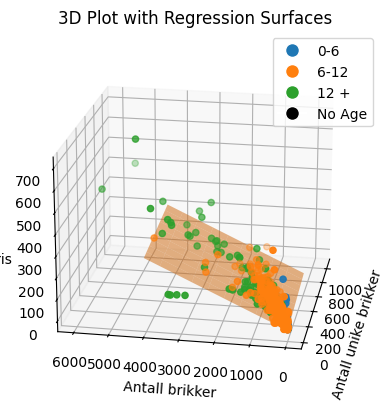

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Plotting in 3D without automatic legend generation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate regression surface and scatter plot for each age group
for i, age in enumerate(labels):
    age_data = df2[df2['Ages'] == age]

    # Scatter plot with label
    ax.scatter(
        age_data['Unique_Pieces'], 
        age_data['Pieces'], 
        age_data['Price'], 
        color=plt.cm.tab10(i), 
        label=age,  # Label for manual legend
        s=20  # Adjust marker size as needed
    )

age_data = df2[df2['Ages'] == '6-12']

# Regression surface unique to age group
regression_x = np.linspace(age_data['Unique_Pieces'].min(), age_data['Unique_Pieces'].max(), 10)
regression_y = np.linspace(age_data['Pieces'].min(), age_data['Pieces'].max(), 10)
regression_x, regression_y = np.meshgrid(regression_x, regression_y)
regression_z = (
    intercept[i] + 
    slope_unique_pieces * regression_x + 
    slope_pieces * regression_y
)
    
ax.plot_surface(regression_x, regression_y, regression_z, color=plt.cm.tab10(1), alpha=0.5)


#ax.plot_surface(regression_x, regression_y, regression_z, color='gray', alpha=0.3)

# Plot labels and legend
ax.set_xlabel('Antall unike brikker')  # 'Unique_Pieces'
ax.set_ylabel('Antall brikker')        # 'Pieces'
ax.set_zlabel('Pris')                  # 'Price'
ax.set_title('3D Plot with Regression Surfaces')

# Adjust view
ax.view_init(elev=20, azim=-170)

# Manually create the legend
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=age, markersize=10, markerfacecolor=plt.cm.tab10(i)) for i, age in enumerate(labels)]
custom_legend.append(plt.Line2D([0], [0], marker='o', color='w', label="No Age", markersize=10, markerfacecolor='black'))
ax.legend(handles=custom_legend, loc='best')

plt.show()


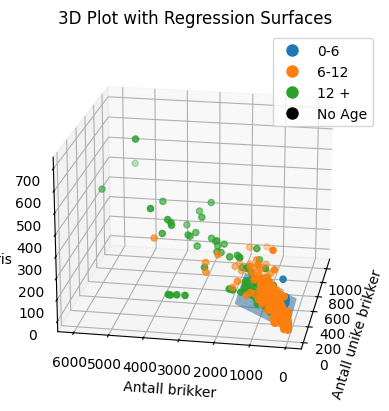

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Plotting in 3D without automatic legend generation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate regression surface and scatter plot for each age group
for i, age in enumerate(labels):
    age_data = df2[df2['Ages'] == age]

    # Scatter plot with label
    ax.scatter(
        age_data['Unique_Pieces'], 
        age_data['Pieces'], 
        age_data['Price'], 
        color=plt.cm.tab10(i), 
        label=age,  # Label for manual legend
        s=20  # Adjust marker size as needed
    )

age_data = df2[df2['Ages'] == '0-6']

# Regression surface unique to age group
regression_x = np.linspace(age_data['Unique_Pieces'].min(), age_data['Unique_Pieces'].max(), 10)
regression_y = np.linspace(age_data['Pieces'].min(), age_data['Pieces'].max(), 10)
regression_x, regression_y = np.meshgrid(regression_x, regression_y)
regression_z = (
    intercept[i] + 
    slope_unique_pieces * regression_x + 
    slope_pieces * regression_y
)
    
ax.plot_surface(regression_x, regression_y, regression_z, color=plt.cm.tab10(0), alpha=0.5)



#ax.plot_surface(regression_x, regression_y, regression_z, color='gray', alpha=0.3)

# Plot labels and legend
ax.set_xlabel('Antall unike brikker')  # 'Unique_Pieces'
ax.set_ylabel('Antall brikker')        # 'Pieces'
ax.set_zlabel('Pris')                  # 'Price'
ax.set_title('3D Plot with Regression Surfaces')

# Adjust view
ax.view_init(elev=20, azim=-170)

# Manually create the legend
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=age, markersize=10, markerfacecolor=plt.cm.tab10(i)) for i, age in enumerate(labels)]
custom_legend.append(plt.Line2D([0], [0], marker='o', color='w', label="No Age", markersize=10, markerfacecolor='black'))
ax.legend(handles=custom_legend, loc='best')

plt.show()


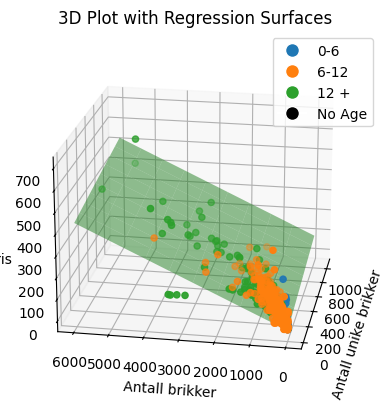

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Plotting in 3D without automatic legend generation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate regression surface and scatter plot for each age group
for i, age in enumerate(labels):
    age_data = df2[df2['Ages'] == age]

    # Scatter plot with label
    ax.scatter(
        age_data['Unique_Pieces'], 
        age_data['Pieces'], 
        age_data['Price'], 
        color=plt.cm.tab10(i), 
        label=age,  # Label for manual legend
        s=20  # Adjust marker size as needed
    )

age_data = df2[df2['Ages'] == '12 +']

# Regression surface unique to age group
regression_x = np.linspace(age_data['Unique_Pieces'].min(), age_data['Unique_Pieces'].max(), 10)
regression_y = np.linspace(age_data['Pieces'].min(), age_data['Pieces'].max(), 10)
regression_x, regression_y = np.meshgrid(regression_x, regression_y)
regression_z = (
    intercept[i] + 
    slope_unique_pieces * regression_x + 
    slope_pieces * regression_y
)
    
ax.plot_surface(regression_x, regression_y, regression_z, color=plt.cm.tab10(2), alpha=0.5)


#ax.plot_surface(regression_x, regression_y, regression_z, color='gray', alpha=0.3)

# Plot labels and legend
ax.set_xlabel('Antall unike brikker')  # 'Unique_Pieces'
ax.set_ylabel('Antall brikker')        # 'Pieces'
ax.set_zlabel('Pris')                  # 'Price'
ax.set_title('3D Plot with Regression Surfaces')

# Adjust view
ax.view_init(elev=20, azim=-170)

# Manually create the legend
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=age, markersize=10, markerfacecolor=plt.cm.tab10(i)) for i, age in enumerate(labels)]
custom_legend.append(plt.Line2D([0], [0], marker='o', color='w', label="No Age", markersize=10, markerfacecolor='black'))
ax.legend(handles=custom_legend, loc='best')

plt.show()


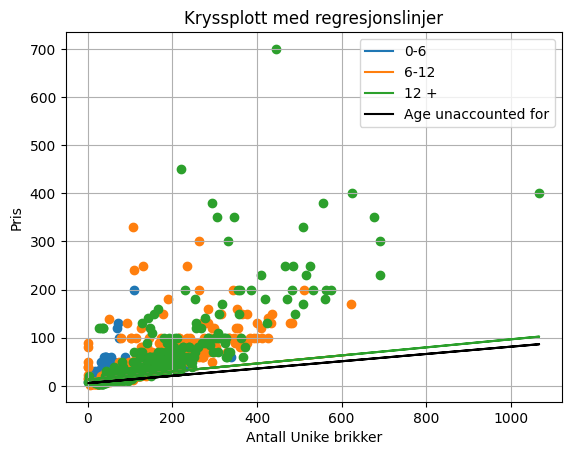

In [45]:
# plott
fit_modell = modell3_mlri.fit()

intercept = [
    fit_results.params['Intercept'],
    fit_results.params['Intercept'] + fit_results.params.get('Ages[T.6-12]', 0), 
    fit_results.params['Intercept'] + fit_results.params.get('Ages[T.12 +]', 0) 
    
]
slope = [
    fit_results.params['Unique_Pieces'],
    fit_results.params['Unique_Pieces'] + fit_results.params.get('Unique_Pieces:Ages[T.6-12]', 0), 
    fit_results.params['Unique_Pieces'] + fit_results.params.get('Unique_Pieces:Ages[T.12 +]', 0)
    
]

for i, age in enumerate(labels):

    age_data = df2[df2['Ages'] == age]

    regression_x = np.array(age_data['Unique_Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(age_data['Unique_Pieces'], age_data['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=age)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(df2['Unique_Pieces'])
regression_y = res_sub.params['Unique_Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Age unaccounted for')
    
plt.xlabel('Antall Unike brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [31]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

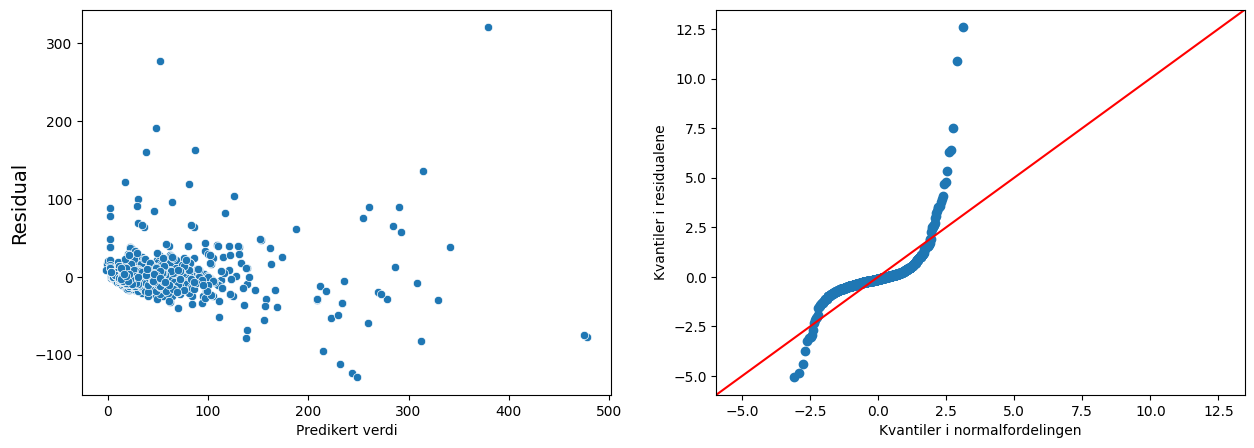

In [32]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual", fontsize=14)
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [33]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

KeyError: 'Theme'

In [ ]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')

KeyError: 'cat'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e3a0d452-d2b7-4a59-8175-1e680cd2337b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>